In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Check shapes
print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [4]:
# Normalize pixel values (0-255) to (0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to add channel dimension (28,28,1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [5]:
# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of model
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the CNN model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9011 - loss: 0.3396 - val_accuracy: 0.9754 - val_loss: 0.0763
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9812 - loss: 0.0636 - val_accuracy: 0.9812 - val_loss: 0.0558
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9868 - loss: 0.0422 - val_accuracy: 0.9847 - val_loss: 0.0490
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9916 - loss: 0.0266 - val_accuracy: 0.9854 - val_loss: 0.0459
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9946 - loss: 0.0187 - val_accuracy: 0.9840 - val_loss: 0.0501


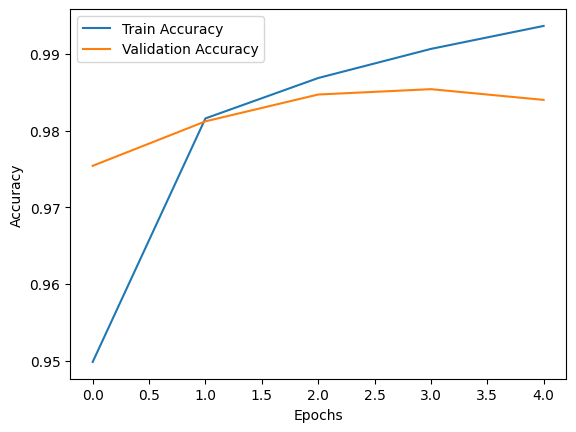

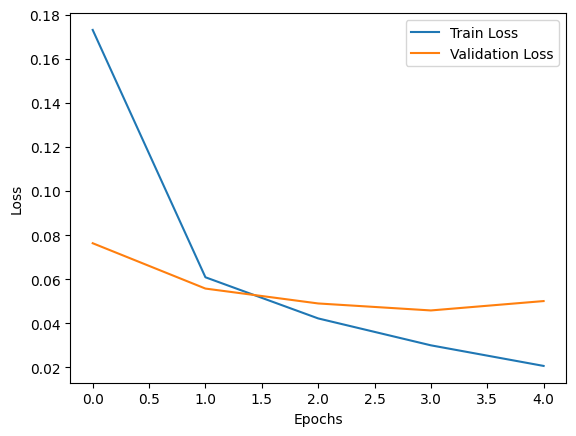

In [7]:
# Plot accuracy and loss graphs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


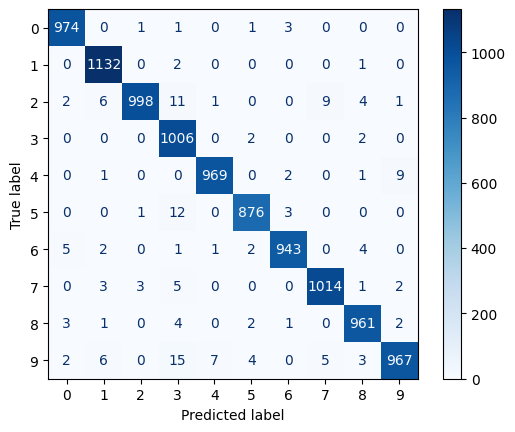

In [8]:
# Evaluate model
predictions = model.predict(test_images)
pred_labels = predictions.argmax(axis=1)
true_labels = test_labels.argmax(axis=1)

# Create confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


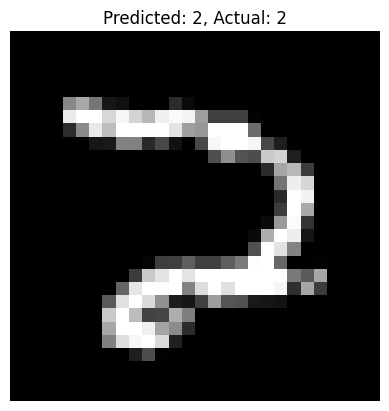

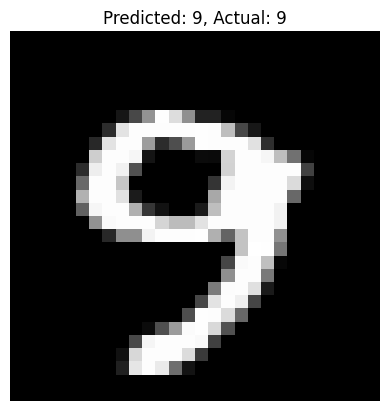

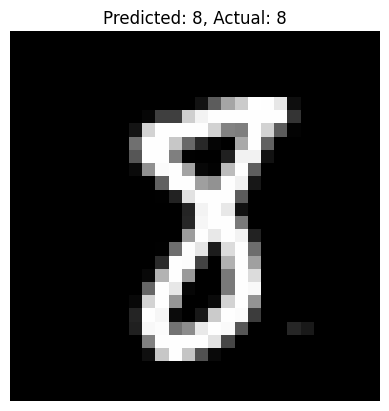

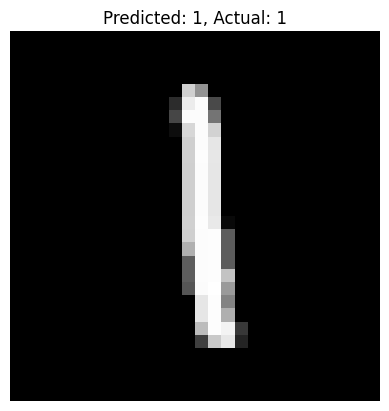

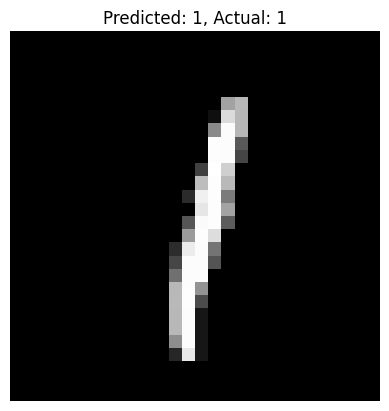

In [9]:
# Display 5 random test images with predicted labels
import numpy as np

for i in range(5):
    idx = np.random.randint(0, len(test_images))
    plt.imshow(test_images[idx].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {pred_labels[idx]}, Actual: {true_labels[idx]}")
    plt.axis('off')
    plt.show()
